In [64]:
#importing values.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#Loading data
test_data=pd.read_csv("test_linear_data.csv").dropna()
train_data=pd.read_csv("train_linear_data.csv").dropna()

In [31]:
#splitting data
test_x_data=np.array(test_data['x'])
test_y_data=np.array(test_data['y'])

train_x_data=np.array(train_data['x'])
train_y_data=np.array(train_data['y'])

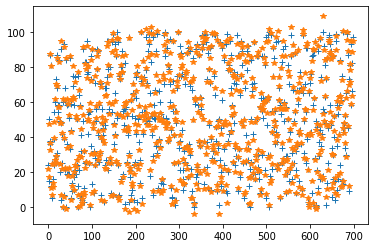

In [32]:
#plotting input data on graph
plt.plot(train_x_data,"+")
plt.plot(train_y_data,'*')
plt.show()

In [33]:
# calculating y_prediction on formula y=mx+c
def y_prediction(train_x_input,m,c):
  y_predicted=np.multiply(m,train_x_input)+c
  return y_predicted

In [34]:
#calculating cost
def calculate_cost(y_predicted,train_y_input):
  cost=np.mean((y_predicted-train_y_input**2))*0.5
  return cost

In [35]:
# gradient descent
def gradient_descent(train_x_input,train_y_input,y_predicted):
  df=y_predicted-train_y_input
  dm=np.mean(np.multiply(df,train_x_input))
  dc=np.mean(df)
  return dm,dc

In [36]:
#updating m and c
def update_m_and_c(dm,dc,m,c,learning_rate):
  m=m-learning_rate*dm
  c=c-learning_rate*dc
  return m,c

In [78]:
#training input
def train_data(train_x_input,train_y_input,learning_rate,iteration):
  #take m and c random
  m=np.random.uniform(0,1)
  c=np.random.uniform(0,1)

  cost_list=[]

  #plt.figure() ###

  for i in range(iteration):
    y_predicted=y_prediction(train_x_input,m,c)
    cost=calculate_cost(y_predicted,train_y_input)
    cost_list.append(cost)

    #fig ,ax=plt.subplots() ###
    #ax.plot(train_x_input,train_y_input,'+',label="Original") ###
    #ax.plot(train_x_input,y_predicted,'*',label="predicted") ###

    #legend=ax.legend() ###
    #plt.show()

    dm,dc=gradient_descent(train_x_input,train_y_input,y_predicted)
    m,c=update_m_and_c(dm,dc,m,c,learning_rate)

  return m,c,cost_list

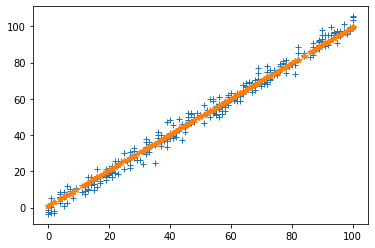

Accuracy :  99.76966523348509


In [95]:
#predicting values
m,c,cost=train_data(train_x_data,train_y_data,0.0001,20)

test_y_predicted=test_x_data*m+c
plt.figure()
plt.plot(test_x_data,test_y_data,'+')
plt.plot(test_x_data,test_y_predicted,'*')
plt.show()

#checking accuracy of this
accuracy=np.mean(test_y_predicted)*100/np.mean(test_y_data)
print("Accuracy : ",accuracy)

65.27277210852462